In [156]:
import numpy as np
import matplotlib.pyplot as plt

# data sliced between master indices 37_000_000 - 37_700_000
start_master_index = 37_000_000
end_master_index = 37_700_000

# this file is large so it was not pushed to GitHub
roach_data = np.load('roach_data.npy', allow_pickle=True).item()

PASS 1
roach 1 start: 135600

In [157]:
# passes and pass_length obtained manually through trial and error
passes = {
    "Roach 1": 134_600,
    "Roach 2": 149_500,
    "Roach 3": 150_150,
    "Roach 4": 147_350,
    "Roach 5": 147_800,
}

pass_lengths = [
    0,
    169450,
    170950,
    171500,
]

C:\Users\Jonah\AppData\Local\Temp\ipykernel_20204\3774527036.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


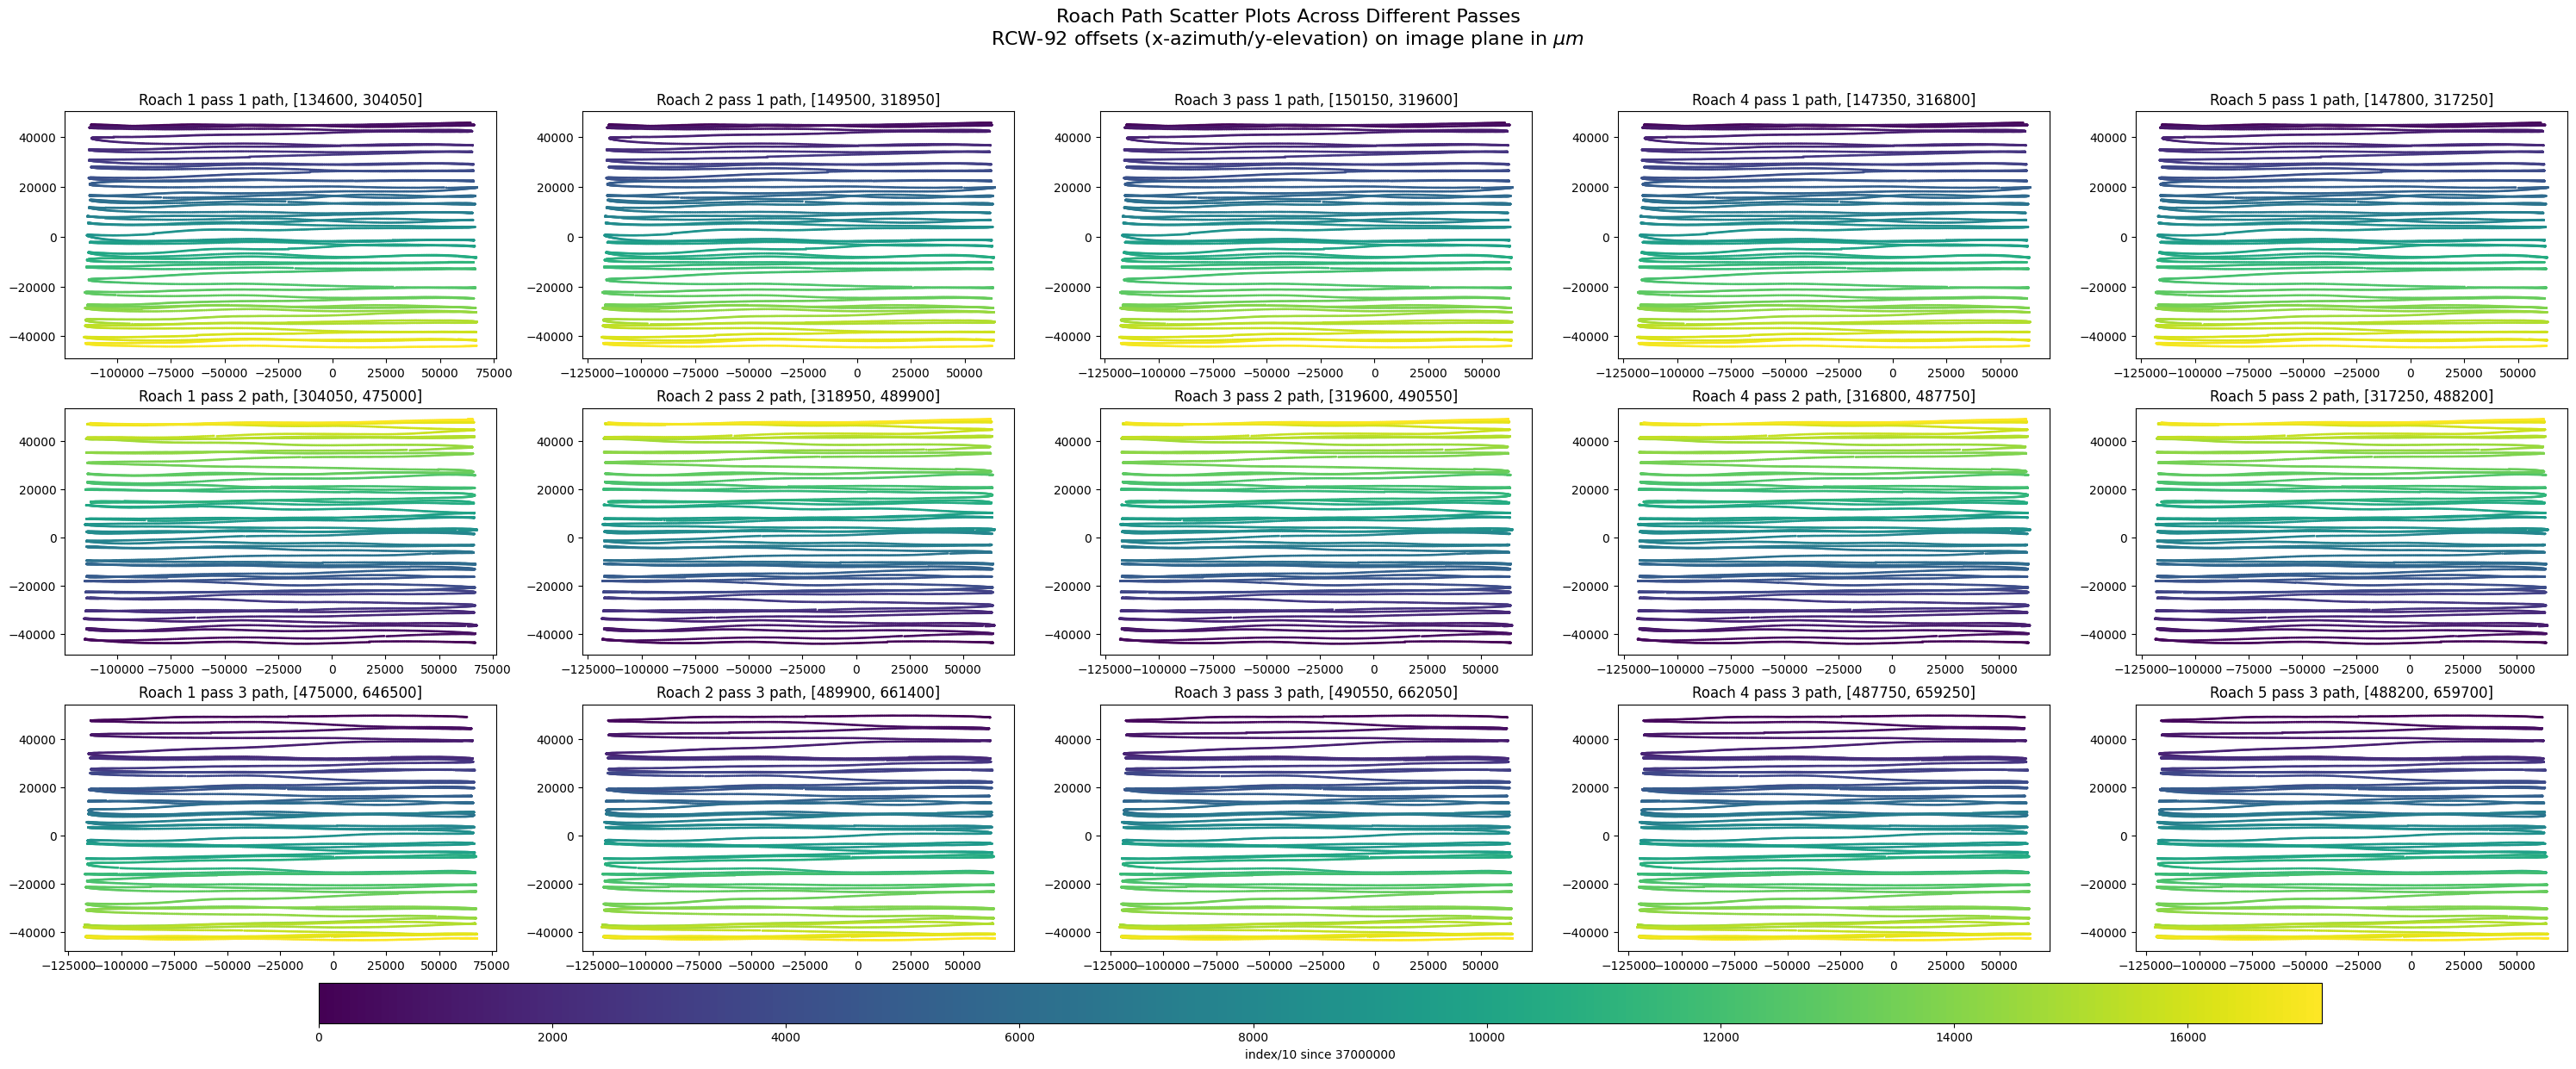

In [182]:
# Set up the figure and axes for a 5x3 grid
fig, axes = plt.subplots(3, 5, figsize=(30, 15))
axes = axes.flatten() 

plot_idx = 0

for pass_idx in (0, 1, 2):
    for roach in (1, 2, 3, 4, 5):
        start = passes[f'Roach {roach}'] + np.sum(pass_lengths[:pass_idx + 1])
        stop = start + pass_lengths[pass_idx + 1]
        step = 10
        
        data = roach_data[roach]
        x_data = data['x_um'][start:stop:step]
        y_data = data['y_um'][start:stop:step]
        
        # Select the corresponding subplot axis
        ax = axes[plot_idx]
        
        # Scatter plot on the current axis
        sc = ax.scatter(x_data, y_data, c=range(len(x_data)), s=1)
        
        # Set the title and labels
        ax.set_title(f"Roach {roach} pass {pass_idx + 1} path, [{start}, {stop}]")
        # ax.set_xlabel("RCW-92 x (azimuthal) offset\n"r"on image plane in $\mu m$")
        # ax.set_ylabel("RCW-92 y (elevation) offset\n"r"on image plane in $\mu m$")

        plot_idx += 1

fig.suptitle("Roach Path Scatter Plots Across Different Passes\n"
             r"RCW-92 offsets (x-azimuth/y-elevation) on image plane in $\mu m$",
             fontsize=16)

# Add a horizontal colorbar at the bottom
cbar = fig.colorbar(sc, ax=axes, orientation='horizontal', aspect=50)
cbar.set_label(f"index/{step} since {start_master_index}")

plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Make space for the title
plt.subplots_adjust(bottom=0.25)  # Make space for the colorbar
plt.show()